# 15 - Hypothesis Testing Overview

**Hypothesis Testing:** Like a courtroom for data. We start by assuming nothing is happening (null hypothesis), then see if the evidence is strong enough to reject that assumption.

**Two Hypotheses:**
- **Null Hypothesis (H₀):** "Nothing is going on. No effect." (Innocent until proven guilty)
- **Alternative Hypothesis (H₁):** "Something is going on. There is an effect."

**Decision Rule:** If the data is surprising enough under H₀ (p-value < 0.05), we reject H₀.

**Key Idea:** We never "prove" anything - we only show evidence against the null hypothesis.

## Simple Example: Does a Coin Flip Fairly?

Flip a coin 100 times, get 60 heads. Is the coin fair or biased?

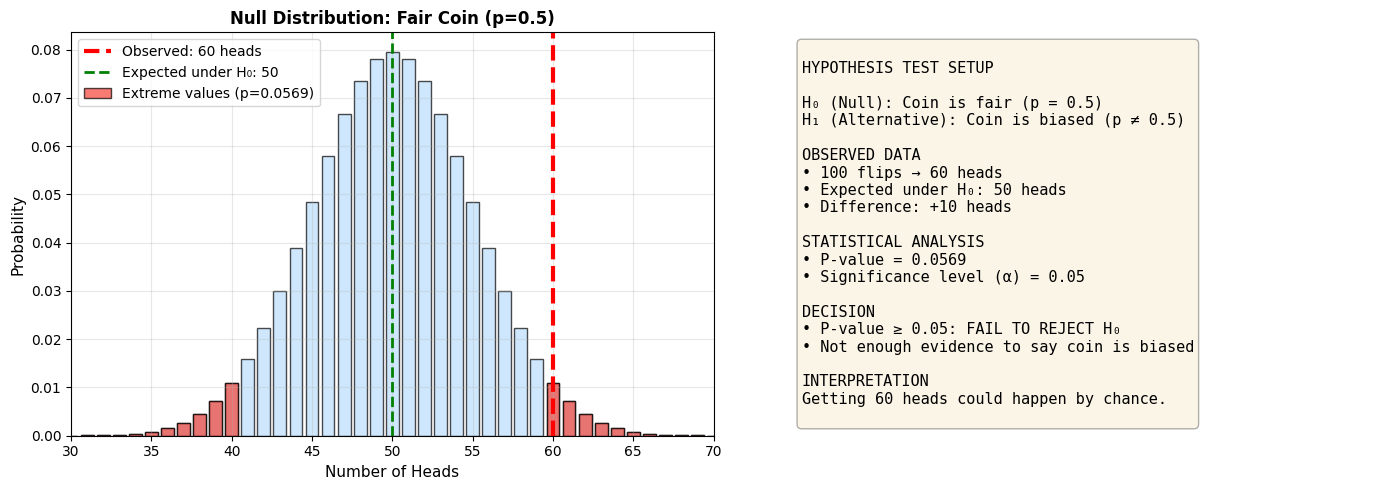


🪙 Hypothesis Test: Is the Coin Fair?

H₀: Coin is fair (p = 0.5)
H₁: Coin is biased (p ≠ 0.5)

Observed: 60 heads in 100 flips
Expected under H₀: 50 heads

P-value: 0.0569
Significance level (α): 0.05

❌ DECISION: Fail to reject H₀
   → NOT enough evidence to say coin is biased
   → Getting 60 heads could happen by chance


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Scenario: 100 flips, 60 heads
n_flips = 100
observed_heads = 60

# Null hypothesis: coin is fair (p = 0.5)
p_null = 0.5

# Under null, this is binomial(n=100, p=0.5)
x = np.arange(0, n_flips + 1)
pmf_null = stats.binom.pmf(x, n_flips, p_null)

# Calculate p-value (two-tailed test)
# P(X >= 60 or X <= 40) under null
p_value = stats.binom.cdf(40, n_flips, p_null) + (1 - stats.binom.cdf(59, n_flips, p_null))

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Null distribution
ax1.bar(x, pmf_null, color='#BBDEFB', alpha=0.7, edgecolor='black')
# Highlight extreme values (>= 60 or <= 40)
extreme_x = x[(x >= 60) | (x <= 40)]
extreme_pmf = stats.binom.pmf(extreme_x, n_flips, p_null)
ax1.bar(extreme_x, extreme_pmf, color='#F44336', alpha=0.7, edgecolor='black', 
       label=f'Extreme values (p={p_value:.4f})')
ax1.axvline(observed_heads, color='red', linestyle='--', linewidth=3, 
           label=f'Observed: {observed_heads} heads')
ax1.axvline(50, color='green', linestyle='--', linewidth=2, label='Expected under H₀: 50')
ax1.set_xlabel('Number of Heads', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Null Distribution: Fair Coin (p=0.5)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_xlim(30, 70)

# Decision visualization
ax2.axis('off')
decision_text = f"""
HYPOTHESIS TEST SETUP

H₀ (Null): Coin is fair (p = 0.5)
H₁ (Alternative): Coin is biased (p ≠ 0.5)

OBSERVED DATA
• 100 flips → 60 heads
• Expected under H₀: 50 heads
• Difference: +10 heads

STATISTICAL ANALYSIS
• P-value = {p_value:.4f}
• Significance level (α) = 0.05

DECISION
{'• P-value < 0.05: REJECT H₀' if p_value < 0.05 else '• P-value ≥ 0.05: FAIL TO REJECT H₀'}
{'• Evidence suggests coin is biased!' if p_value < 0.05 else '• Not enough evidence to say coin is biased'}

INTERPRETATION
{'Getting 60+ heads is unusual for a fair coin.' if p_value < 0.05 else 'Getting 60 heads could happen by chance.'}
"""

ax2.text(0.1, 0.5, decision_text, fontsize=11, family='monospace',
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\n🪙 Hypothesis Test: Is the Coin Fair?")
print(f"\nH₀: Coin is fair (p = 0.5)")
print(f"H₁: Coin is biased (p ≠ 0.5)")

print(f"\nObserved: {observed_heads} heads in {n_flips} flips")
print(f"Expected under H₀: {n_flips * p_null:.0f} heads")

print(f"\nP-value: {p_value:.4f}")
print(f"Significance level (α): 0.05")

if p_value < 0.05:
    print(f"\n✅ DECISION: Reject H₀")
    print(f"   → There IS evidence the coin is biased")
    print(f"   → Getting {observed_heads} heads is too unusual for a fair coin")
else:
    print(f"\n❌ DECISION: Fail to reject H₀")
    print(f"   → NOT enough evidence to say coin is biased")
    print(f"   → Getting {observed_heads} heads could happen by chance")

## Real-World Example: Does a New Ad Increase Sales?

Old ad: 20% conversion. New ad: 23% conversion (100 users). Is the improvement real?

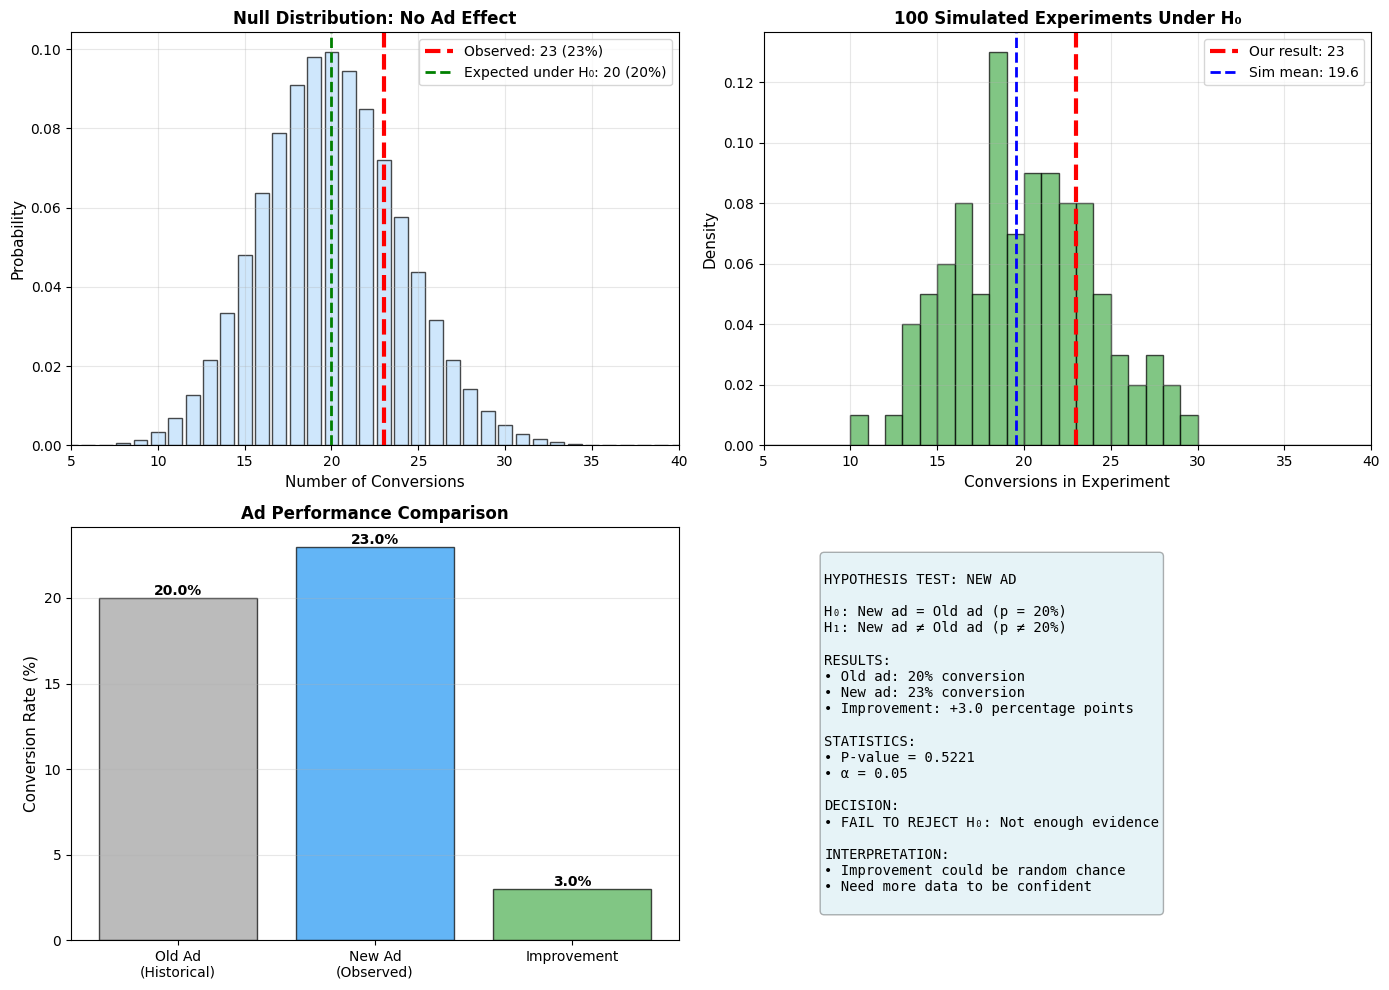


📊 Hypothesis Test: New Ad Performance

H₀: New ad = Old ad (20% conversion)
H₁: New ad ≠ Old ad

Data:
   → Old ad: 20% conversion
   → New ad: 23/100 = 23% conversion
   → Improvement: +3.0 percentage points

Statistics:
   → P-value: 0.5221
   → Significance level: 0.05

⚠️ DECISION: Fail to reject H₀
   → Not enough evidence that new ad is better
   → Improvement could be random chance
   → Need more data or bigger sample

💡 Business implication:
   → Run larger test before making decision


In [2]:
# Scenario
n_users = 100
old_conversion = 0.20  # Historical rate
new_conversions = 23   # Observed with new ad
new_rate = new_conversions / n_users

# H₀: New ad has same conversion as old (p = 0.20)
# H₁: New ad has different conversion (p ≠ 0.20)

# Under null, conversions ~ Binomial(n=100, p=0.20)
x_conv = np.arange(0, n_users + 1)
pmf_conv = stats.binom.pmf(x_conv, n_users, old_conversion)

# P-value (two-tailed)
p_value_ad = 2 * min(
    stats.binom.cdf(new_conversions, n_users, old_conversion),
    1 - stats.binom.cdf(new_conversions - 1, n_users, old_conversion)
)

# Simulate what we'd see under null (100 experiments)
np.random.seed(42)
null_experiments = np.random.binomial(n_users, old_conversion, 100)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Null distribution
ax1 = axes[0, 0]
ax1.bar(x_conv, pmf_conv, color='#BBDEFB', alpha=0.7, edgecolor='black')
ax1.axvline(new_conversions, color='red', linestyle='--', linewidth=3,
           label=f'Observed: {new_conversions} ({new_rate:.0%})')
ax1.axvline(n_users * old_conversion, color='green', linestyle='--', linewidth=2,
           label=f'Expected under H₀: {n_users * old_conversion:.0f} ({old_conversion:.0%})')
ax1.set_xlabel('Number of Conversions', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Null Distribution: No Ad Effect', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_xlim(5, 40)

# Simulation under null
ax2 = axes[0, 1]
ax2.hist(null_experiments, bins=range(0, 41), density=True, alpha=0.7, 
        color='#4CAF50', edgecolor='black')
ax2.axvline(new_conversions, color='red', linestyle='--', linewidth=3,
           label=f'Our result: {new_conversions}')
ax2.axvline(np.mean(null_experiments), color='blue', linestyle='--', linewidth=2,
           label=f'Sim mean: {np.mean(null_experiments):.1f}')
ax2.set_xlabel('Conversions in Experiment', fontsize=11)
ax2.set_ylabel('Density', fontsize=11)
ax2.set_title('100 Simulated Experiments Under H₀', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xlim(5, 40)

# Comparison
ax3 = axes[1, 0]
scenarios = ['Old Ad\n(Historical)', 'New Ad\n(Observed)', 'Improvement']
rates = [old_conversion * 100, new_rate * 100, (new_rate - old_conversion) * 100]
colors = ['#9E9E9E', '#2196F3', '#4CAF50']
bars = ax3.bar(range(3), rates, color=colors, alpha=0.7, edgecolor='black')
ax3.set_xticks(range(3))
ax3.set_xticklabels(scenarios)
ax3.set_ylabel('Conversion Rate (%)', fontsize=11)
ax3.set_title('Ad Performance Comparison', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, rates):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

# Decision flowchart
ax4 = axes[1, 1]
ax4.axis('off')
decision_box = f"""
HYPOTHESIS TEST: NEW AD

H₀: New ad = Old ad (p = {old_conversion:.0%})
H₁: New ad ≠ Old ad (p ≠ {old_conversion:.0%})

RESULTS:
• Old ad: {old_conversion:.0%} conversion
• New ad: {new_rate:.0%} conversion
• Improvement: +{(new_rate - old_conversion)*100:.1f} percentage points

STATISTICS:
• P-value = {p_value_ad:.4f}
• α = 0.05

DECISION:
{'• REJECT H₀: Use new ad!' if p_value_ad < 0.05 else '• FAIL TO REJECT H₀: Not enough evidence'}

INTERPRETATION:
{'• Improvement is statistically significant' if p_value_ad < 0.05 else '• Improvement could be random chance'}
{'• New ad likely better than old' if p_value_ad < 0.05 else '• Need more data to be confident'}
"""

ax4.text(0.1, 0.5, decision_box, fontsize=10, family='monospace',
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\n📊 Hypothesis Test: New Ad Performance")
print(f"\nH₀: New ad = Old ad ({old_conversion:.0%} conversion)")
print(f"H₁: New ad ≠ Old ad")

print(f"\nData:")
print(f"   → Old ad: {old_conversion:.0%} conversion")
print(f"   → New ad: {new_conversions}/{n_users} = {new_rate:.0%} conversion")
print(f"   → Improvement: +{(new_rate - old_conversion)*100:.1f} percentage points")

print(f"\nStatistics:")
print(f"   → P-value: {p_value_ad:.4f}")
print(f"   → Significance level: 0.05")

if p_value_ad < 0.05:
    print(f"\n✅ DECISION: Reject H₀ - Use the new ad!")
    print(f"   → The improvement is statistically significant")
    print(f"   → New ad is likely better than old ad")
else:
    print(f"\n⚠️ DECISION: Fail to reject H₀")
    print(f"   → Not enough evidence that new ad is better")
    print(f"   → Improvement could be random chance")
    print(f"   → Need more data or bigger sample")

print(f"\n💡 Business implication:")
if p_value_ad < 0.05:
    print(f"   → Roll out new ad to all users")
else:
    print(f"   → Run larger test before making decision")

## Summary: Hypothesis Testing Framework

### The Process
1. **Set up hypotheses:**
   - H₀ (null): No effect, no difference, status quo
   - H₁ (alternative): There is an effect or difference

2. **Collect data and calculate test statistic**

3. **Calculate p-value:**
   - How surprising is this data if H₀ were true?

4. **Make decision:**
   - If p < α (usually 0.05): Reject H₀
   - If p ≥ α: Fail to reject H₀

### Key Concepts
- **We never "accept" H₀** - we only fail to find evidence against it
- **We never "prove" H₁** - we only show evidence supporting it
- **Burden of proof is on H₁** - like "innocent until proven guilty"

### Common Significance Levels
- **α = 0.05:** Standard in most fields (5% chance of false positive)
- **α = 0.01:** More conservative (1% chance of false positive)
- **α = 0.10:** Less strict (10% chance of false positive)

### Real-World Applications
- **A/B testing:** Does new website design increase conversions?
- **Medical trials:** Does new drug work better than placebo?
- **Quality control:** Is production process meeting standards?
- **Marketing:** Does ad campaign increase sales?

**Remember:** Hypothesis testing is about finding evidence, not proof!